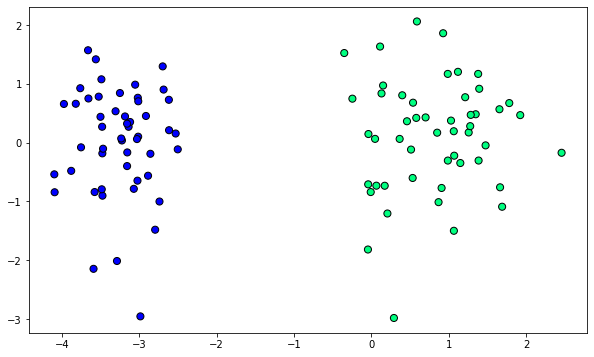

In [52]:
# create a classification dataset with 2 features and 2 classes
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

# Plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', marker='o', s=50, edgecolor='k')

Slope =  -22.2106066417024
Intercept =  [-26.69522924]


/home/derq/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


(-3.0, 3.0)

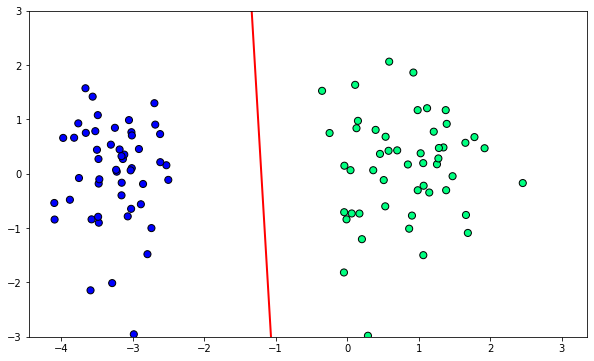

In [53]:
# fit a logistic regression model to the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', solver='sag')
model.fit(X, y)

# Get the slope and intercept of the decision boundary
slopeSk = -(model.coef_[0][0] / model.coef_[0][1])
interceptSk = -(model.intercept_ / model.coef_[0][1])
print('Slope = ', slopeSk)
print('Intercept = ', interceptSk)

# Plotting the decision boundary
import numpy as np
x_values = np.linspace(-3, 3, 100)
y_values = slopeSk * x_values + interceptSk
plt.figure(figsize=(10,6))
plt.plot(x_values, y_values, c='r', linewidth=2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', marker='o', s=50, edgecolor='k')
plt.ylim(-3, 3)


In [56]:
# define a sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Create my own Logistic Regression function
def LogisticRegressionFromScratch(X, y):
    # Add a column of ones to X (intercept term)
    X = np.insert(X, 0, 1, axis=1)
    # Initialize the weights
    weights = np.ones(X.shape[1])
    # Set learning rate
    lr = 0.5
    # Set the number of epochs
    epochs = 2500

    # Looping through the epochs
    for epoch in range(epochs):
        # Calculate y_hat
        z = np.dot(X, weights)
        y_hat = sigmoid(z)
        # Update the weights
        weights += lr * np.dot(y - y_hat, X) / X.shape[0]
        
    return weights

Slope =  -25.388544075572273
Intercept =  -29.949114409110653


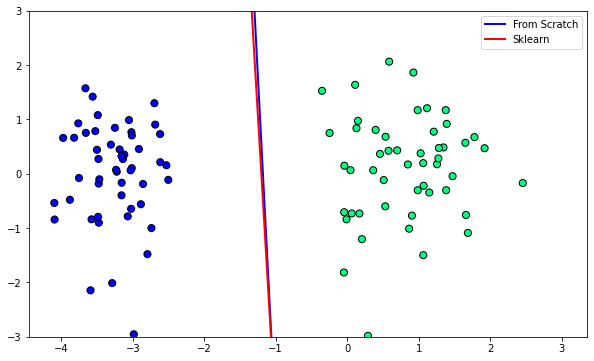

In [61]:
model = LogisticRegressionFromScratch(X, y)
slope = -(model[1] / model[2])
intercept = -(model[0] / model[2])
print('Slope = ', slope)
print('Intercept = ', intercept)

# Plotting the decision boundary from our own Logistic Regression function
x_values = np.linspace(-3, 3, 100)
y_values = slope * x_values + intercept
y_values_sk = slopeSk * x_values + interceptSk
plt.figure(figsize=(10,6))
plt.plot(x_values, y_values, c='b', linewidth=2, label='From Scratch')
plt.plot(x_values, y_values_sk, c='r', linewidth=2, label='Sklearn')
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', marker='o', s=50, edgecolor='k')
plt.ylim(-3, 3)
plt.legend()
